In [1]:
!pwd
# !ls /tf/DataProjects/luciana/NewBoreholeMarcio/

/tf/DataProjects/luciana/NewBoreholeMarcio/EntregaPetroDissolucao


In [6]:
# !pip install autokeras
# !pip install PyQt5
# !pip install scikit-image
# !apt-get update
# !apt-get install ffmpeg libsm6 libxext6  -y
# !pip install seaborn
# !pip install laspy==1.5.0
# !pip install lasio
# !pip install autoviz
#!pip install pandas-profiling
#import lasio
#import codecs
import random, os, copy, sys
import seaborn as sns
import os
#import laspy
import pickle
import autokeras as ak
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time
import pandas as pd
from tensorflow.keras.models import load_model
import warnings
#import seaborn as sbr
# import pandas_profiling
warnings.filterwarnings('ignore')

#<ipython-input-2-25c748861504>:27: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
#   import pandas_profiling

In [7]:
# G = ["8", "9"]
G = ["7"]
stringGPUs = []
for i in G:
    GPS = "GPU:" + i
    stringGPUs.append(GPS)


print(stringGPUs)
print(",".join(G))
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = ",".join(G)

if len(G) > 1:
    strategy = tf.distribute.MirroredStrategy(devices=stringGPUs)#, cross_device_ops=tf.distribute.NcclAllReduce())
else:
    strategy = tf.distribute.OneDeviceStrategy(device=stringGPUs[0])

print("Number of devices: {}".format(strategy.num_replicas_in_sync))

['GPU:7']
7
Number of devices: 1


In [8]:
data_dirSave = "/tf/DataProjects/luciana/NewBoreholeMarcio"
# import sys
# sys.path.insert(0, os.path.join(data_dirSave,"EntregaPetroDissolucao"))
# from data_loader import load_dataClassNewMarcio#, load_dataClass2Borehole

Blind = False
IDx1Borehole = "W1" 
IDx2Borehole = "_5315-5738m_AMP" #

# Ref IDx1Borehole:
#["W1", "W2", "W5", "W6", "W8", "W9", "W10", "W11", "W12", "W13"]
# Ref IDx2Borehole:
#["_5315-5738m_AMP", "_5485_5915m_AMP", "_AMP", "_AMP", "_AMP", "_AMP", "_AMP", "_AMP", "_AMP", "_AMP"]



In [9]:

start_time = time.time()
 
h = IDx1Borehole + IDx2Borehole  

if not Blind:
    data_dirClass = os.path.join(data_dirSave, IDx1Borehole + "_FACIESRODAAN.csv")
    
else:
    data_dirClass = None
    

df0 = pd.read_csv(data_dirClass)
if df0.shape[1] < 2:
    df0 = pd.read_csv(data_dirClass, sep=";")
# print(df0)

DEP = list(df0.columns)

DepthNoInterp = df0[DEP[0]].values


if type(DepthNoInterp[0]) != type(0.0): # retirando subtitulo se houver da coluna depth do dado acustico
    DepthNoInterp = DepthNoInterp[1:]
    
DepthNoInterp = np.float64(DepthNoInterp) # transforma em array float 64 
    
ClassNoInterp = df0[DEP[1]]

if type(ClassNoInterp[0]) != type(0.0): # retirando subtitulo se houver da coluna depth do dado acustico
    ClassNoInterp = ClassNoInterp[1:]
    
ClassNoInterp = np.float64(ClassNoInterp)

data_dirACOUST = os.path.join(data_dirSave, h + ".csv")
ACOUST = pd.read_csv(data_dirACOUST, sep=";")
# print(ACOUST)

ACOUST = ACOUST.values  # pega só os valores do dado acustico
DIMG = ACOUST[:,0] # pega só a primeira coluna do dado acustico pra os depth

if type(DIMG[0]) != type(0.0): # retirando subtitulo se houver da coluna depth do dado acustico
    DIMG = DIMG[1:]

DIMG = np.float64(DIMG) # transforma lista de depht em array float 64
#print(DIMG)
#print(DIMG.shape)    

IMG = ACOUST[:,1:] # pega para imagem acustica os dados sem a coluna de dept

if type(IMG[0]) != type(0.0): # retirando subtitulo se houver da coluna depth do dado acustico
    IMG = IMG[1:,:]
    
    
IMG = np.float64(IMG) # transforma dado acustico da imagem em array float 64

if IMG.shape[1] > 180:
    IMG = IMG[:,:-1]
#print(IMG)
#print(IMG.shape)



######## Verify line Image acoustic without information
# for i in range(IMG.shape[0]):
#     IMG[i]




print("###################")
print("Shape DEPHT ACOUSTIC DATA:")
#print(DIMG)
print(DIMG.shape)
print("###################")
print("Shape IMG ACOUSTIC DATA:")
print(IMG.shape)
#print(DepthNoInterp)
print("###################")
print("Shape DEPHT CLASSIFICATION DISSOLUTION DATA:")
print(DepthNoInterp.shape)
#print(ClassNoInterp)
print("###################")
print("Shape CLASSIFICATION DISSOLUTION DATA:")
print(ClassNoInterp.shape)
#data_norm, data = load_dataClassNewMarcio(data_dirIMG=data_dirIMG, data_dirClass=data_dirClass, data_dirSave=data_dirSave,MakeChannels=True, dataPred=False, DataTrain=None,sep=None, Blind=Blind)


print("Time load data :")   
print(time.time() - start_time)

###################
Shape DEPHT ACOUSTIC DATA:
(83268,)
###################
Shape IMG ACOUSTIC DATA:
(83268, 180)
###################
Shape DEPHT CLASSIFICATION DISSOLUTION DATA:
(3051,)
###################
Shape CLASSIFICATION DISSOLUTION DATA:
(3051,)
Time load data :
1.744628667831421


In [12]:
!ls -l /tf/DataProjects/luciana/Data_Curvas_Petro_Marcio


total 5692
-rwxrwxrwx 1 1001 1001  542206 Aug  6  2021 W10_BASICOS.asc
-rwxrwxrwx 1 1001 1001  503624 Aug  6  2021 W11_BASICOS.asc
-rwxrwxrwx 1 1001 1001  239610 Aug  6  2021 W12_BASICOS.asc
-rwxrwxrwx 1 1001 1001  313441 Aug  6  2021 W13_BASICOS.asc
-rwxrwxrwx 1 1001 1001  315461 Aug  6  2021 W14_BASICO.asc
-rwxrwxrwx 1 1001 1001  320713 Aug  6  2021 W1_BASICOS.asc
-rwxrwxrwx 1 1001 1001  306977 Aug  6  2021 W2_BASICOS.asc
-rwxrwxrwx 1 1001 1001  379192 Aug  6  2021 W4_BASICOS.asc
-rwxrwxrwx 1 1001 1001 1839450 Aug  6  2021 W5_BASICOS.asc
-rwxrwxrwx 1 1001 1001  342024 Aug  6  2021 W6_BASICOS.asc
-rwxrwxrwx 1 1001 1001  369799 Aug  6  2021 W7_BASICOS.asc
-rwxrwxrwx 1 1001 1001  330914 Aug  6  2021 W8_BASICOS.asc


In [11]:
fl = '/tf/DataProjects/luciana/Data_Curvas_Petro_Marcio/' + IDx1Borehole + '_BASICOS.asc'
f = open(fl, 'r') # 'r' = read
lines = f.read()
print(lines) # show headers

# print(type(lines))
f.close()

# obtem headers e unidades (Não pode ser direto por causa da linha 3)
dfh = pd.read_csv(fl, nrows=0, sep=' ', skipinitialspace=True)
dfu = pd.read_csv(fl, skiprows=1, nrows=0, sep=' ', skipinitialspace=True)

# limpa colunas sem nome no header
idxNames = []
for n,i in enumerate(dfh.columns):
    if i[0:7] == "Unnamed":
        dfh = dfh.drop(columns=[i])
        dfu = dfu.drop(columns=[i])
    else:
        idxNames.append(n)
        
headers = list(dfh.columns) #['DEPTH', 'GR', 'CAL', 'RES90', 'RES10', 'nmrFF', 'nmrPerm', 'nmrPhie', 'nmrPhiT']
unidades = list(dfu.columns) #['M', 'gAPI', 'in', 'ohm.m', 'ohm.m', 'Dec', 'md', 'Dec', 'Dec']
df = pd.read_csv(fl, skiprows=3, sep=' ', skipinitialspace=True, names=headers, usecols=idxNames)#, names=headers)
# print(df.shape)
# dfN3 = pd.merge(df, dfCD, on="DEPTH")


# redefinindo o topo e a base de acordo com o depth gabarito de classificação
dfN = df.drop(df[df["DEPTH"] < DepthNoInterp[0]].index, axis=0)
dfN2 = dfN.drop(dfN[dfN["DEPTH"] > np.float32(DepthNoInterp[len(DepthNoInterp) - 1])].index, axis=0)


for i in headers:
    dfN2 = dfN2.drop(dfN2[dfN2[i] == -999.0].index, axis=0)
    
# print(dfN2.shape)
# print(len(ClassNoInterp))


# print(dfN2)
GR = np.array(dfN2["GR"])
CPRN = np.array(dfN2["DEPTH"])
CAL = np.array(dfN2["CAL"])
CR1 = np.array(dfN2["RES90"])
CR2 = np.array(dfN2["RES10"])
nmrFF = np.array(dfN2["nmrFF"])
nmrPerm = np.array(dfN2["nmrPerm"])
nmrPhie = np.array(dfN2["nmrPhie"])
nmrPhiT = np.array(dfN2["nmrPhiT"])

# dfN3 = pd.concat([dfN2, df0["faciesdissolucao"]], axis=1, join="inner")

# print(dfN3)
PRESS = "nmrPhiT"

DEPTH      GR         CAL        RES90      RES10      nmrFF      nmrPerm    nmrPhie    nmrPhiT    
M          GAPI       IN         OHMM       OHMM       V/V        MD         V/V        V/V        
$Format : 11,11,11,11,11,11,11,11,11
5308.7016  10.7616    17.4049    212.2674   1950.0000  -999.0000  -999.0000  0.6037     -999.0000  
5308.8540  15.6743    17.3898    234.6023   1950.0000  -999.0000  -999.0000  0.6275     -999.0000  
5309.0064  19.9313    17.4038    268.6724   1950.0000  -999.0000  -999.0000  0.6351     -999.0000  
5309.1588  21.8262    17.4468    340.1465   1950.0000  -999.0000  -999.0000  0.6398     -999.0000  
5309.3112  24.2218    17.4838    422.1753   1950.0000  -999.0000  -999.0000  0.6509     -999.0000  
5309.4636  30.5042    17.5222    531.9662   1950.0000  -999.0000  -999.0000  0.6731     -999.0000  
5309.6160  38.6632    17.5386    660.7980   1950.0000  -999.0000  -999.0000  0.6952     -999.0000  
5309.7684  42.0327    17.4380    740.7371   1950.0000  -999.000

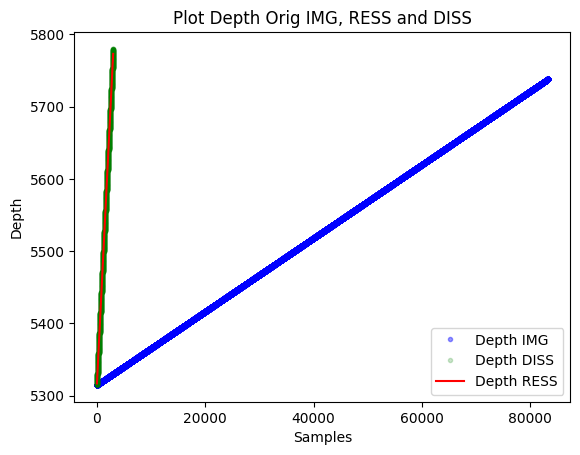

In [8]:
plt.figure()
plt.title("Plot Depth Orig IMG, RESS and DISS")
deptIMG = DIMG
#print(deptIMG.shape)
nsampIMG = np.arange(0,deptIMG.shape[0],1)
deptDISS = DepthNoInterp
nsampDISS = np.arange(0,len(deptDISS),1) #np.zeros((len(deptDISS),1)) + 0.00001
deptRESS = CPRN
nsampRESS = np.arange(0,len(deptRESS),1) #np.zeros((len(deptRESS),1)) #np.arange(0,len(deptRESS),1)
plt.plot(nsampIMG, deptIMG, ".b", alpha=0.4, label="Depth IMG")
plt.plot(nsampDISS, deptDISS, ".g", alpha=0.2, label="Depth DISS")
plt.plot(nsampRESS, deptRESS, "-r", alpha=1.0, label="Depth RESS")
# plt.plot(nsampDISS, deptDISS, ".r", alpha=0.1, label="Depth DISS")
# plt.xlim([0.0, 0.2])
plt.xlabel("Samples")
plt.ylabel('Depth')
plt.legend()
plt.show()


In [9]:
#### Cut top and bottom from DISS
iIMG = deptIMG[:1] # first depth
fIMG = deptIMG[-1:] # last depth 
iDISS = deptDISS[:1]#.values[0] # first depth
fDISS = deptDISS[-1:]#.values[0] # last depth 
iRESS = deptRESS[:1]#.values[0] # first depth
fRESS = deptRESS[-1:]#.values[0] # last depth 

print(" ###############################")
print(" # first and last depth IMG:")
print(iIMG,fIMG)
print(" ###############################")
print(" # resolution IMG:")
print(deptIMG[1:2] - deptIMG[:1])
print(" ###############################")
print(" # first and last depth DISS:")
print(iDISS,fDISS)
print(" ###############################")
print(" # resolution DISS:")
print(deptDISS[1:2] - deptDISS[:1])
print(" ###############################")
print(" # first and last depth RESS:")
print(iRESS,fRESS)
print(" ###############################")
print(" # resolution RESS:")
print(deptRESS[1:2] - deptRESS[:1])
print(" ###############################")
print(" # number depth RESS Orig:")
print(len(deptRESS))
# NewRESS = deptRESS[deptRESS >= iDISS[0]]
# NewRESS = NewRESS[NewRESS <= fDISS[0]]
# print(" ###############################")
# print(" # number depth RESS before cut top and bottom:")
# print(len(NewRESS))
# print(" # number depth DISS Orig:")
# print(len(deptDISS))
# NewDISS = deptDISS[deptDISS >= iRESS]
# NewDISS = NewDISS[NewDISS <= fRESS]
# print(" ###############################")
# print(" # number depth DISS before cut top and bottom:")
# print(len(NewDISS))






 ###############################
 # first and last depth IMG:
[5315.00628] [5738.00264]
 ###############################
 # resolution IMG:
[0.00508]
 ###############################
 # first and last depth DISS:
[5315.1024] [5779.9224]
 ###############################
 # resolution DISS:
[0.1524]
 ###############################
 # first and last depth RESS:
[5317.0837] [5773.0714]
 ###############################
 # resolution RESS:
[0.1524]
 ###############################
 # number depth RESS Orig:
2993


In [10]:
dIMG = pd.DataFrame({"Dep": DIMG, "lineIMG": nsampIMG})
dDISS = pd.DataFrame({"Dep": DepthNoInterp, "DISS": ClassNoInterp})
Dress = np.float64(deptRESS)
ress = np.float64(dfN2[PRESS])
# print(np.float64(a[0]))
dRESS = pd.DataFrame({"Dep": Dress, PRESS: ress})
# print(dRESS)

In [11]:
#### Interpolate Depth DISS and Depth RESS using DataFrame pandas


# dF = pd.merge(dIOTBF,dRESS, on="Dep")
dF = pd.concat([dDISS,dRESS],axis=0)
# print(dF)

dF = dF.sort_values(by=['Dep'])
# print(dF)

SS = pd.Series(dF["DISS"])
SS = SS.interpolate(method='pad', limit=2) # interpola primeiro a dissolucao em relacao a ressonancia
# print(SS)

dF["DISS"] = np.array(SS)
# print(dF)

SS2 = pd.Series(dF[PRESS])
SS2 = SS2.interpolate(method='linear') #method='linear') method='polynomial', order=2)# interpola primeiro a dissolucao em relacao a ressonancia
# print(SS2)

dF[PRESS] = np.array(SS2)
# print(dF)

dF = dF.dropna(subset=[PRESS]) # clean rows NaN in columns nmrPhie top and bottom
print(dF)

dF.to_csv("Interpolate_RessAndDiss_DataFrame.csv")


            Dep  DISS  nmrPhiT
0     5317.0837   1.0  0.16710
14    5317.2360   1.0  0.16405
1     5317.2361   1.0  0.16100
15    5317.3884   0.0  0.16065
2     5317.3885   0.0  0.16030
...         ...   ...      ...
3046  5779.3128   0.0  0.31000
3047  5779.4652   0.0  0.31000
3048  5779.6176   0.0  0.31000
3049  5779.7700   0.0  0.31000
3050  5779.9224   0.0  0.31000

[6030 rows x 3 columns]


In [12]:
#### Interpolate Depth IMG and Depth DISS using DataFrame pandas

dI = pd.concat([dIMG,dDISS],axis=0) # concatenate dataframe acoustic data and dataframe dissolution data
# print(dI)


# print(len(deptIMG))
# print(len(deptDISS))
# print(len(deptIMG)+len(deptDISS))

dIO = dI.sort_values('Dep')  # ordena valores de depth dos dois dataframes concatenados
# print(dIO)


##### Clean top Depth Img from DISS
nNaN = np.where(dIO["DISS"] >= 0.0)[0][0]
# print(nNaN)

dIOTB = dIO.iloc[nNaN:,:] # cut only top, because bottom equal
# print(dIOTB)

##### function fill NaN between DISS   ############################

def fillNaNDISS(V,fill="first"):
    CONTR = []
    V0 = V.copy()
    INTnan = np.where(V >= 0.0)[0]
    for n,i in enumerate(INTnan):
        if n > 0:
            inic = INTnan[n-1]
            fin = INTnan[n]
            R = fin - inic
            CONTR.append(R)
#             print("Before:")
#             print("V[" + str(inic) + ":" + str(fin) + "]")
#             print(V0[inic:fin])
#             if not len(np.where(V0[inic:fin] >= 0.0)[0]) > 1:
#                print(V0[inic:fin])
            if fill == "first":
                FL = np.ones((R,)) * V0[inic]
            else:
                FL = np.ones((R,)) * V0[fin]
            V[inic:fin] = FL
#             print("After:")
#             print("V[" + str(inic) + ":" + str(fin) + "]")
#             print(FL)
    return V,CONTR
#####################################################################

VFN, CONTR = fillNaNDISS(np.array(dIOTB["DISS"]),fill="first")  # call function to fill NaN in dissolution column

path = "COUNTPOSSIBLESWINDOWS_DISSOLUTION.pkl"
drr = {IDx1Borehole: np.array(CONTR)}
if os.path.exists(path):
    with open(path,'rb') as f:
        DR = pickle.load(f)
#     DR = pd.DataFrame(DataR)
    Tit = DR.keys() #list(DR.columns)
    if not IDx1Borehole in Tit:
        DR.update({IDx1Borehole: np.array(CONTR)})
#         print(IDx1Borehole)
#         print(DR)
#         kkkk
        with open(path,'wb') as f:
            pickle.dump(DR,f)
else:
    with open(path,'wb') as f:
        pickle.dump(drr,f)

dIOTB["DISS"] = VFN # change column in dataframe 

fNaN = np.where(dIOTB["DISS"] >= 0.0)[0][-1] # find last row value dissolution to cut botton acoustic data

#print(dIOTB.shape[0])
#print(fNaN)

if dIOTB.shape[0] > fNaN:  # verify if NaN botton dissolution column
    dIOTB = dIOTB.iloc[:fNaN,:] 

# print(dIOTB)


dIOTBF = dIOTB.dropna(subset=['lineIMG']) # clean rows NaN in columns lineIMG, if duplicate lineIMG from depth dissolution and depth acoustic after concatenate dataframe
print(dIOTBF) 

# the test NaN: fill 1000.0 to NaN, after find values 1000.0, if exist values 1000.0, the print showed
dIOTBF = dIOTBF.fillna(1000.0) #test NaN, fill nan to 1000.0
print(len(np.where(dIOTBF["DISS"] == 1000.0)[0])) # test NaN, count element 1000.0 = NaN

print("IF VALUE ABOVE NOT 0, EXIST ERROR ********************************************")

              Dep  lineIMG  DISS
19     5315.10280     19.0   0.0
20     5315.10788     20.0   0.0
21     5315.11296     21.0   0.0
22     5315.11804     22.0   0.0
23     5315.12312     23.0   0.0
...           ...      ...   ...
83263  5737.98232  83263.0   2.0
83264  5737.98740  83264.0   2.0
83265  5737.99248  83265.0   2.0
83266  5737.99756  83266.0   2.0
83267  5738.00264  83267.0   2.0

[83249 rows x 3 columns]
0
IF VALUE ABOVE NOT 0, EXIST ERROR ********************************************


In [13]:
dFF = pd.concat([dIOTBF,dF],axis=0)
dFF = dFF.sort_values('Dep')
# print(dFF)

SS3 = pd.Series(dFF[PRESS])
SS3 = SS3.interpolate(method='linear') # interpola nmrPhie 
# print(SS3)

dFF[PRESS] = np.array(SS3) # aplica interpolacao no dataframe
# print(dFF)

dFF = dFF.dropna(subset=['lineIMG']) # clean rows NaN in columns lineIMG (se não tem imagem não adianta)
# print(dFF)

dFF = dFF.dropna(subset=[PRESS]) # clean rows NaN in columns nmrPhie (não faz interpolacao linear backforward,só repete)
print(dFF)


dFF.to_csv("Interpolate_AcuAndRessAndDiss_DataFrame.csv")

              Dep  lineIMG  DISS   nmrPhiT
409    5317.08400    409.0   1.0  0.167002
410    5317.08908    410.0   1.0  0.166903
411    5317.09416    411.0   1.0  0.166805
412    5317.09924    412.0   1.0  0.166706
413    5317.10432    413.0   1.0  0.166608
...           ...      ...   ...       ...
83263  5737.98232  83263.0   2.0  0.236330
83264  5737.98740  83264.0   2.0  0.236114
83265  5737.99248  83265.0   2.0  0.235898
83266  5737.99756  83266.0   2.0  0.235682
83267  5738.00264  83267.0   2.0  0.235466

[82859 rows x 4 columns]


In [14]:
#descriptive statistics
profile = pandas_profiling.ProfileReport(dFF, title="Data NMR Petrobras Report", explorative=True)
profile.to_file("ReportDataNMR.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
def MinMaxScaler(array, scale=[0, 1]):
    if scale[0] is not None:
        array_max = array.max()
        array_min = array.min()
        result = scale[0] + (((array - array_min) * (scale[1] - scale[0])) / (array_max - array_min))
    else:
        result = array
    return result

In [40]:
def uniqueStr(l):
    u = list(set(l))
    i = []
    for c in l:
        i.append(int(c))
        
    return u,i

cl = ['green', 'red', 'blue', "black", "orange", "yellow", "gray", "lime", "pink"]
initIMG = int(dFF["lineIMG"].values[0])
fIMG = int(dFF["lineIMG"].values[-1])

orig = IMG[initIMG:fIMG,:] # image from lineIMG dataframe
orig = MinMaxScaler(orig, scale=[0, 255])
orig = MinMaxScaler(orig, scale=[0, 127])

RessInterp = dFF[PRESS].values

DepthInterp = dFF["Dep"].values
ClassInterp = dFF["DISS"].values
#print(ClassInterp[0:50])
Ylevels, Ynum = uniqueStr(ClassInterp)

n_classes = len(Ylevels)

CP = np.zeros((DepthInterp.shape[0], n_classes))
for y in range(n_classes):
    CP[:, y] = DepthInterp

In [ ]:
# def MinMaxScaler(array, scale=[0, 1]):
#     if scale[0] is not None:
#         array_max = array.max()
#         array_min = array.min()
#         result = scale[0] + (((array - array_min) * (scale[1] - scale[0])) / (array_max - array_min))
#     else:
#         result = array
#     return result

# torig = orig[0:500]
# torig2 = MinMaxScaler(torig, scale=[0, 255])
# torig2 = MinMaxScaler(torig, scale=[0, 127])
# plt.figure()
# plt.imshow(torig2, cmap="hot")
# plt.show()
# plt.figure()
# plt.imshow(torig)
# plt.show()

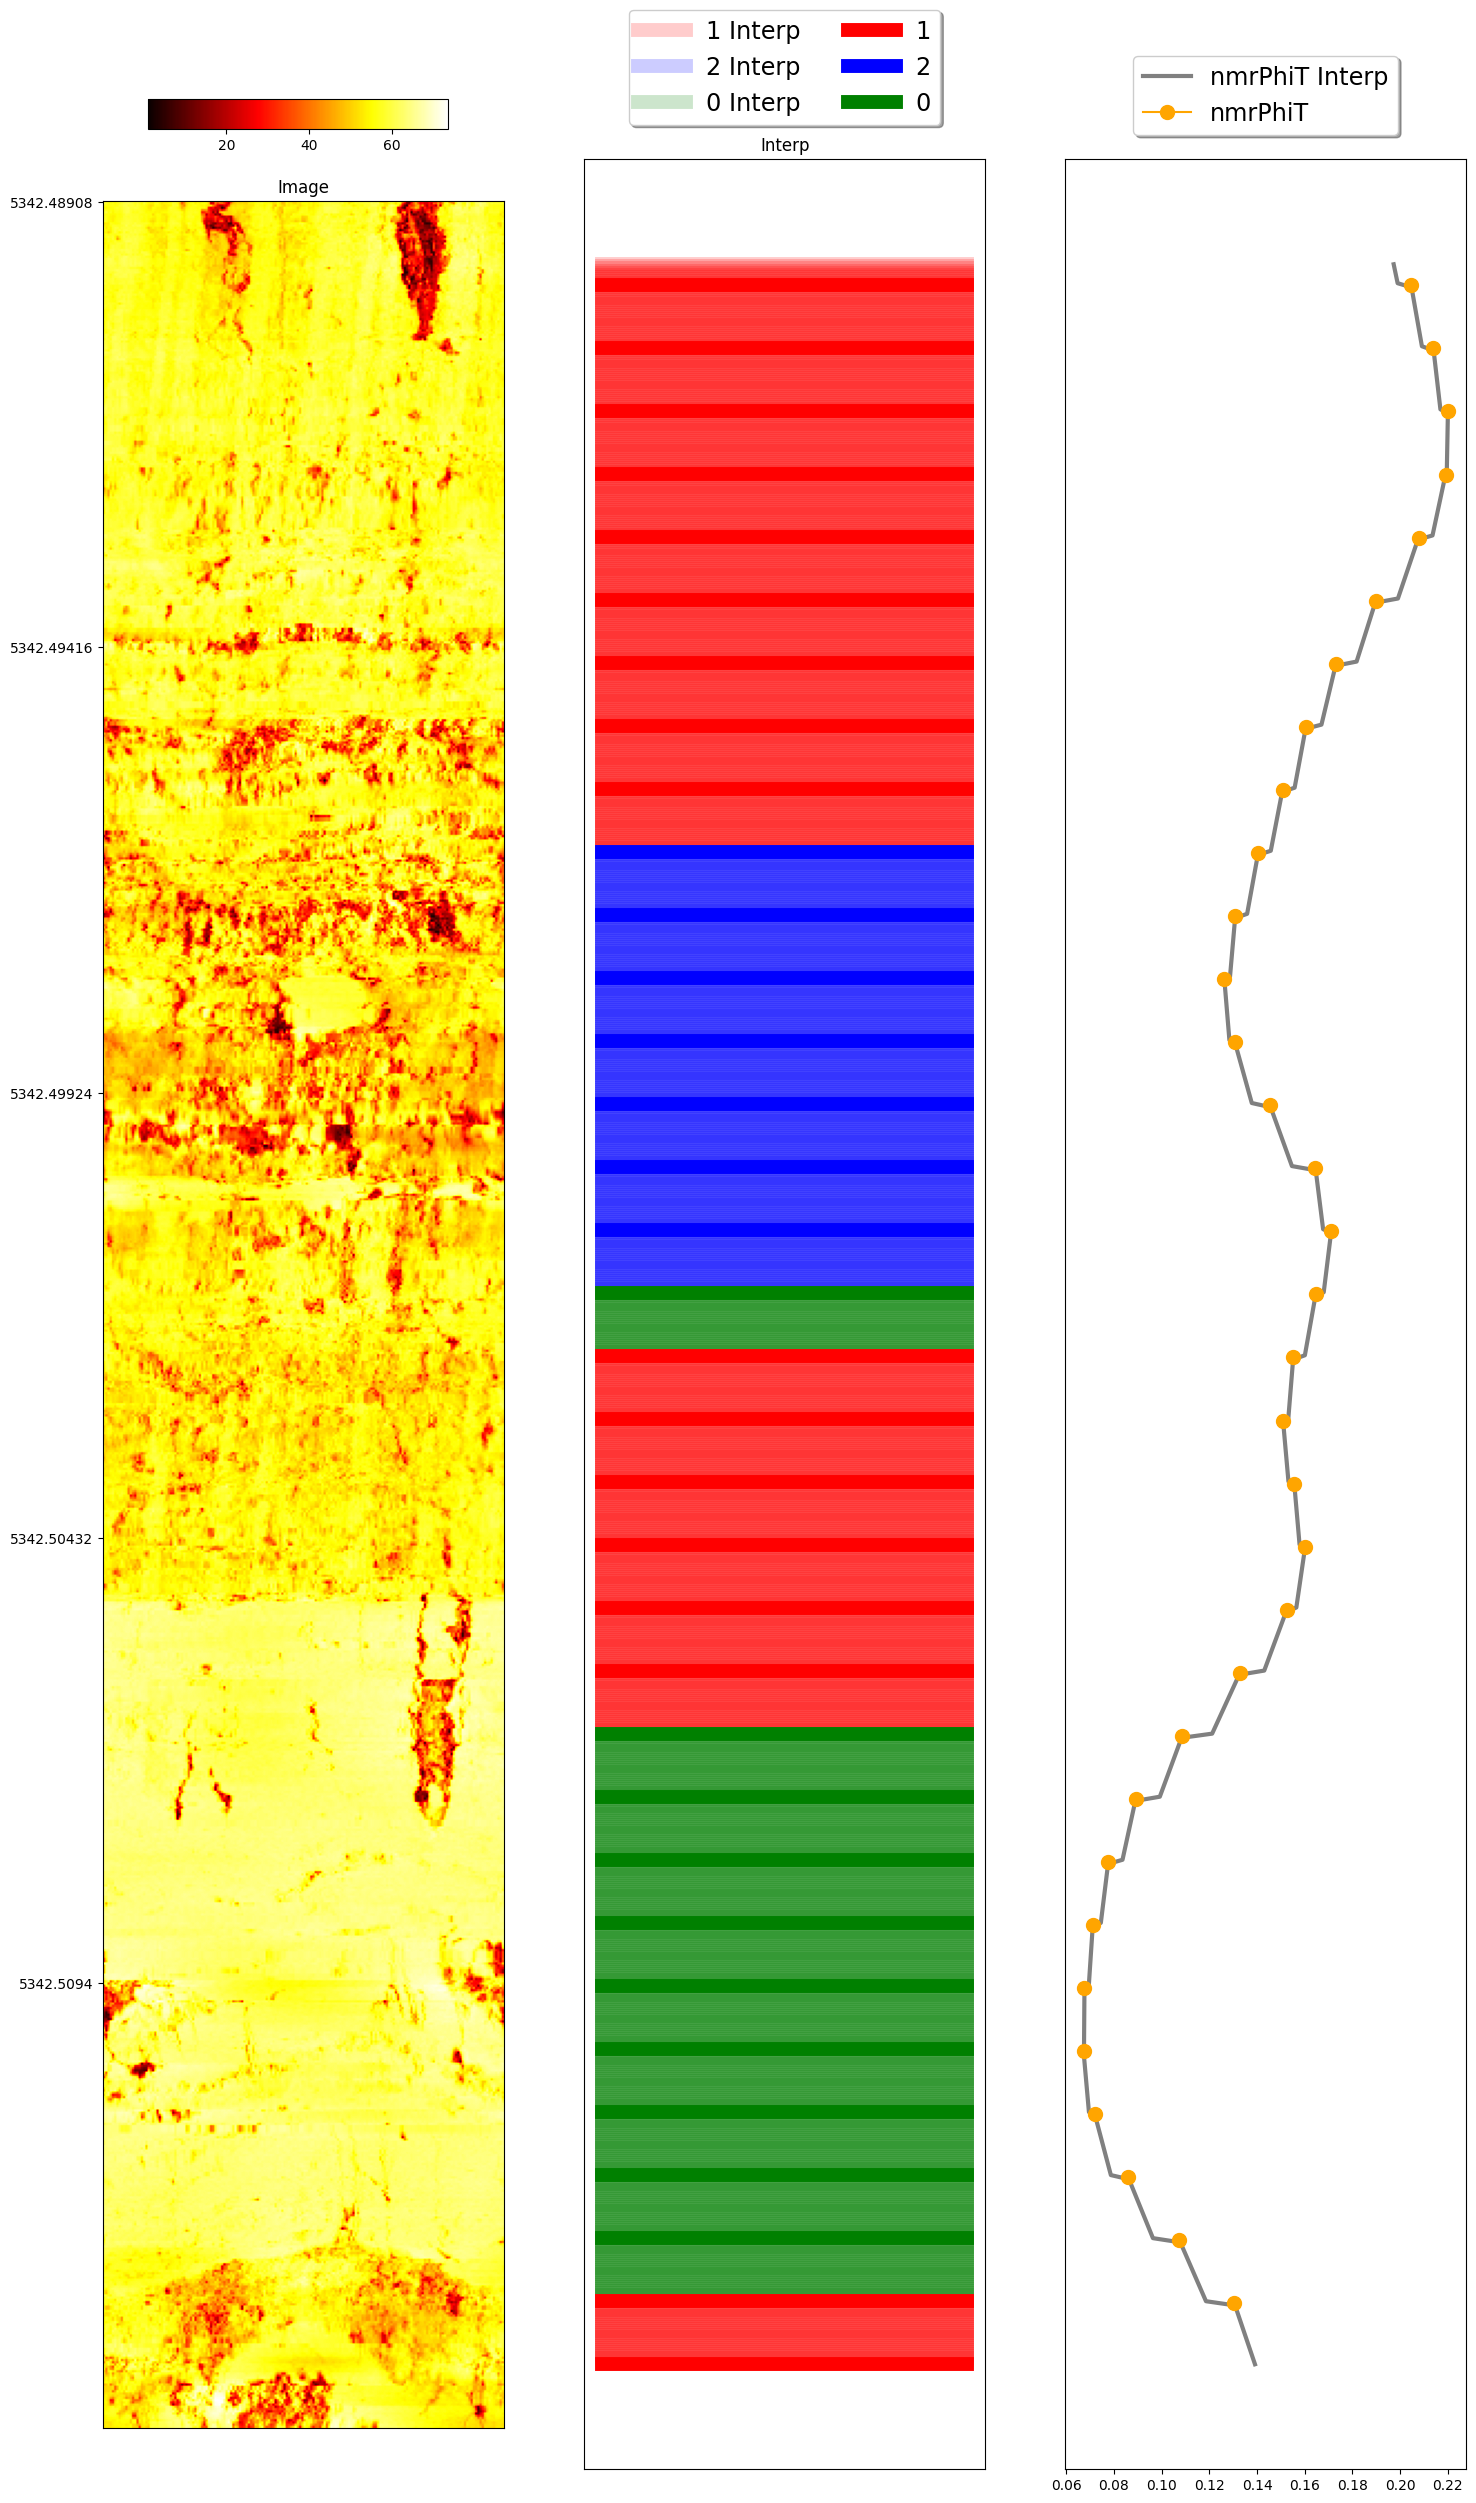

In [41]:

PlotsVert = True
if PlotsVert:
    inic = 5000
    fin = inic + 1000
    fig = plt.figure(figsize=(30, 30))#constrained_layout=True)
    fig.tight_layout(pad=1.0)
    ax1 = fig.add_subplot(151)
    ax2 = fig.add_subplot(152)
    ax4 = fig.add_subplot(153)
    ax1.imshow(orig[inic:fin, :], cmap="hot")#, origin='lower')
    im = ax1.imshow(orig[inic:fin, :], cmap="hot")
#     ax1.imshow(orig[inic:fin, :], cmap="gray", origin='lower') #Invert image
    ax1.set_title("Image")
#     ax1.set_ylim(ax1.get_ylim()[::-1])  # invertendo axes y
    ax1.set_yticklabels(DepthInterp[inic:fin])
    ax1.axes.get_xaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    CPR = CP[inic:fin,:]
    YNN = ClassInterp[inic:fin]
    UNIC = []
    for g, j in zip(np.arange(0,len(YNN),1), YNN):
        if not int(j) in UNIC:
            UNIC.append(int(j))
            ax2.plot(np.arange(0,n_classes,1), CPR[g,:], cl[int(j)], alpha=0.2, label=str(int(j)) + " Interp", linewidth=10)
        else:
            ax2.plot(np.arange(0,n_classes,1), CPR[g,:], cl[int(j)], alpha=0.2, linewidth=10)
            
    UNIC = []
    for g, j in zip(ClassNoInterp, DepthNoInterp):
        if j >= DepthInterp[inic] and j <= DepthInterp[fin]:
            if not int(g) in UNIC:
                UNIC.append(int(g))
                ax2.plot(np.arange(0,n_classes,1), j * np.ones((n_classes,)), cl[int(g)], alpha=1.0, label=str(int(g)), linewidth=10)
            else:
                ax2.plot(np.arange(0,n_classes,1), j * np.ones((n_classes,)), cl[int(g)], alpha=1.0, linewidth=10)
        
    ax2.set_title("Interp")
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=2, fancybox=True, shadow=True, fontsize='xx-large')
    ax2.set_ylim(ax2.get_ylim()[::-1])  # invertendo axes y
    UNIC = []
    ax4.plot(RessInterp[inic:fin], np.array(DepthInterp[inic:fin]), cl[6], label=PRESS + " Interp", linewidth=3)
    ctt = 0
    for i,j in zip(ress,Dress):
        if j >= DepthInterp[inic] and j <= DepthInterp[fin]:
            if ctt == 0:
                ax4.plot(i,j, color=cl[4], marker = 'o', ms = 10, label=PRESS)
                ctt = 1
            else:
                ax4.plot(i,j, color=cl[4], marker = 'o', ms = 10)
    
    ax4.set_ylim(ax4.get_ylim()[::-1])
    ax4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True, fontsize='xx-large')
    cax = fig.add_axes([0.14, 0.89, 0.1, 0.01]) # posicao da esquerda, posicao no topo, largura colorbar, altura colorbar
    fig.colorbar(im, cax=cax, orientation='horizontal')
fig.savefig("TESTFIG.png")

plt.show()

In [ ]:
path = "COUNTPOSSIBLESWINDOWS_DISSOLUTION.pkl"

if os.path.exists(path):
    with open(path,'rb') as f:
        DataR = pickle.load(f)
        
# print(DataR)


In [ ]:
# Usar curvas de PhiT, Phie, FF (diferenca entre elas)
# Ele ficou de enviar o dado de Gama Ray
# Ele ficou de enviar o diametro dos pocos
# Gama ray alto > 80 => argila é não reservatório

#Analise Gama ray ideal entre  0.0 - 30